In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_extra_spaces(df, col)
# be as soon as possible
# '''

# features + tfidf(ngram=(1,1)) + rating + tense + scaled(length) + absolute_sentiment

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_extra_spaces(df, col)\n# be as soon as possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
fields = ['comment', \
      'rating', 'past', 'future', 'length_words', \
      'sentiScore', \
      #'sentiScore_pos', 'sentiScore_neg', \
      'label']
data = DataLoader(fields, stopwords=True)
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_train.shape

(1092, 305)

========================= DecisionTree =========================
Elapsed Time: 36.4177 seconds
DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)
Train Accuracy: 0.6621, F1: [0.6875 0.5631 0.6551 0.7247]
Test  Accuracy: 0.601, F1: [0.625  0.5333 0.619  0.62  ]


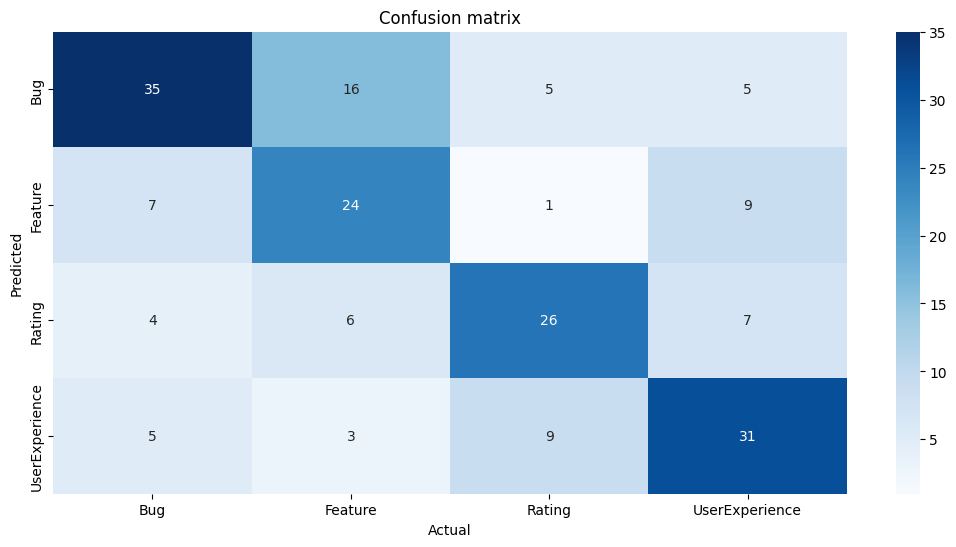

========================= LSVM =========================
Elapsed Time: 17.2801 seconds
LinearSVC(C=0.1, dual=False)
Train Accuracy: 0.7537, F1: [0.7755 0.6341 0.7532 0.8019]
Test  Accuracy: 0.6632, F1: [0.7463 0.4762 0.6154 0.7143]


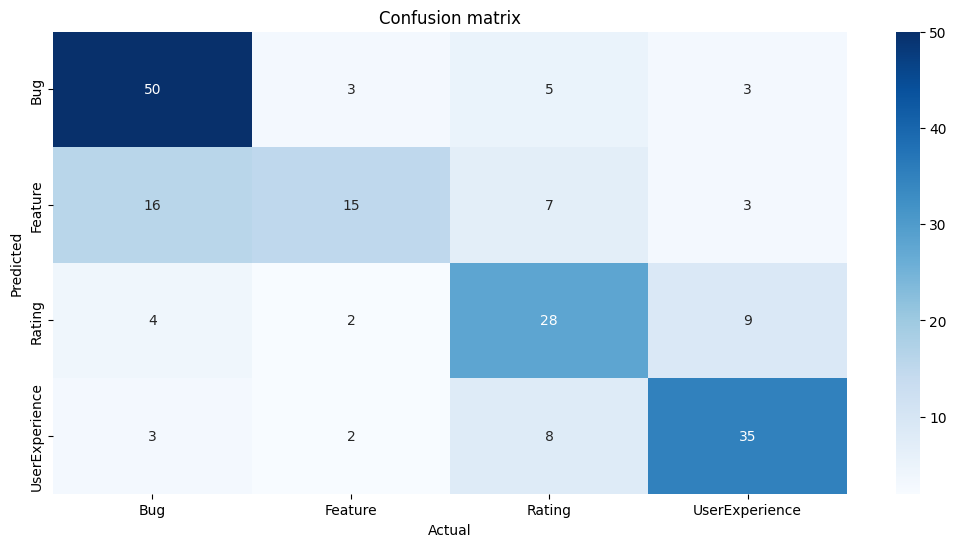

========================= RandomForest =========================
Elapsed Time: 50.3176 seconds
RandomForestClassifier(max_depth=17, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=300)
Train Accuracy: 0.8855, F1: [0.9241 0.9364 0.8196 0.8724]
Test  Accuracy: 0.6062, F1: [0.6917 0.3934 0.5455 0.6731]


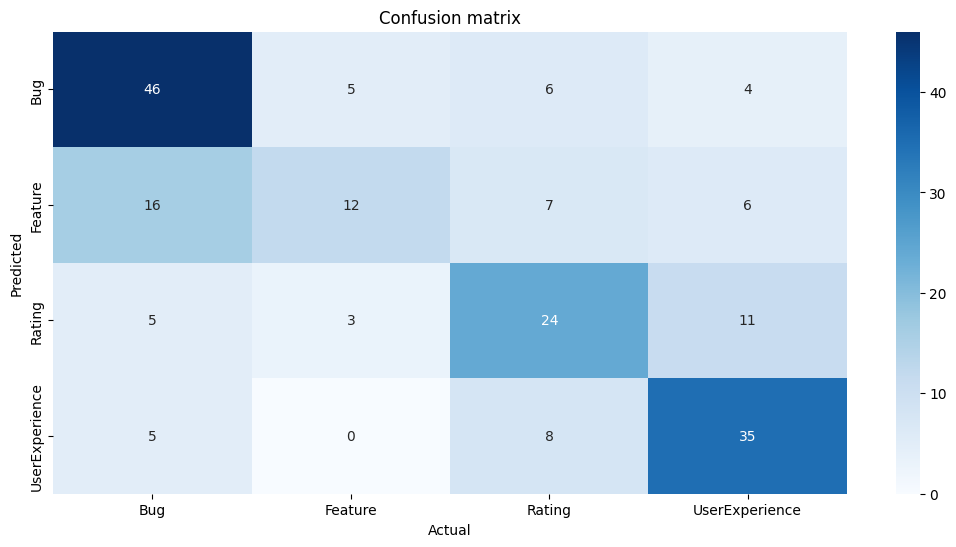

========================= AdaBoost =========================
Elapsed Time: 6.8476 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=100, dual=False),
                   learning_rate=0.01)
Train Accuracy: 0.7811, F1: [0.7961 0.7044 0.7821 0.8164]
Test  Accuracy: 0.6632, F1: [0.7385 0.5143 0.6    0.7292]


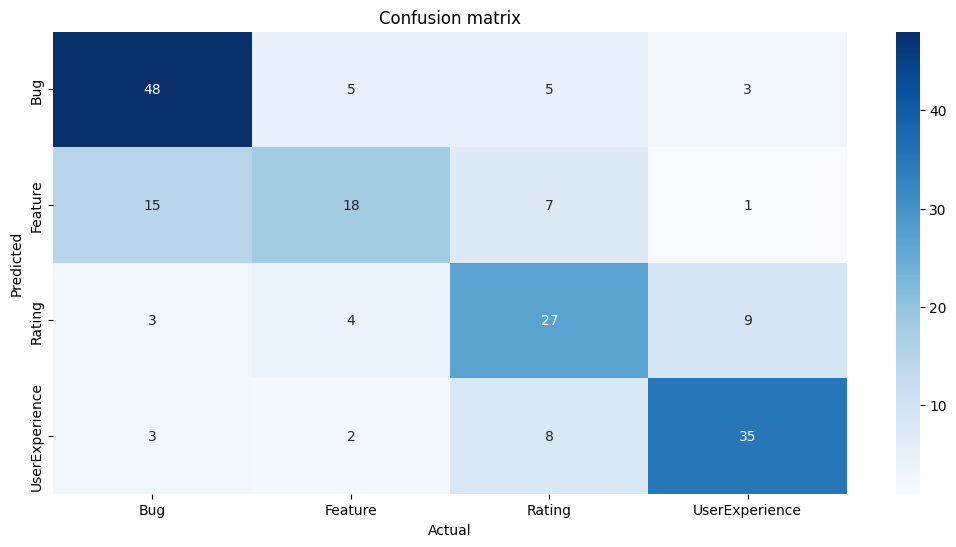

========================= XGBoost =========================
Elapsed Time: 89.0969 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7715231510779588, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.22605276045036699, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.13326896769022872, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=113, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.9844, F1: [0.9915 0.9935 0.9743 0.9801]
Test  Accuracy: 0.6373, F1: [0.6992 0.5333 0.6154 0.6598]


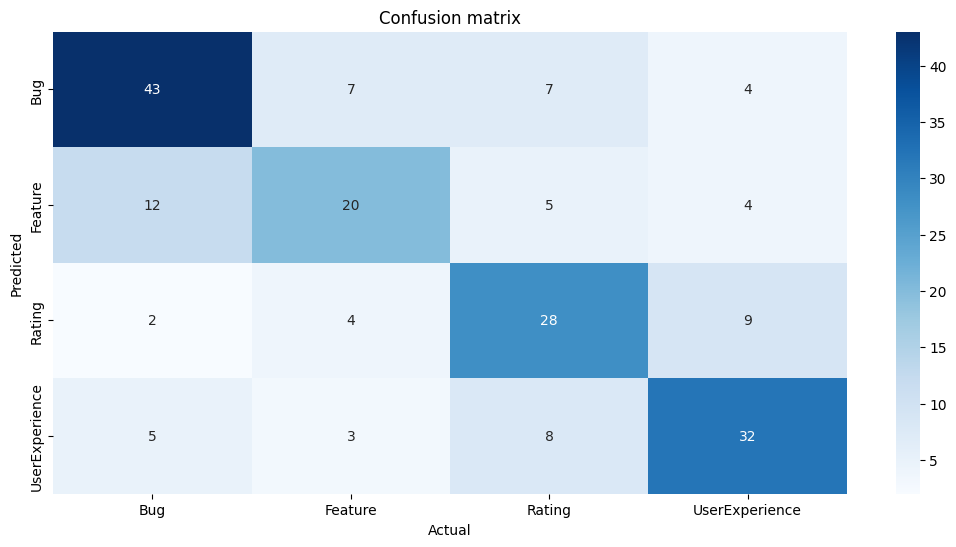

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)